In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tmdb_movies.csv')

In [3]:
third_quartile = df['vote_count'].quantile(0.75)

In [4]:
filtered_df = df[df['vote_count'] > third_quartile]

In [5]:
sorted_df = filtered_df.sort_values(by='vote_average', ascending=False)

In [6]:
top_10_movies = sorted_df.head(10)
top_10_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
df['release_year'] = df['release_date'].dt.year

In [9]:
after_filter_df = df[(df['release_year'] >= 2010) & (df['release_year'] <= 2016)]

In [10]:
grouped_df = after_filter_df.groupby('release_year').agg({'revenue': 'mean', 'budget': 'mean'}).reset_index()

In [11]:
grouped_df

,release_year,revenue,budget
0,2010.0,9.043811e+07,3.449541e+07
1,2011.0,9.200413e+07,3.477232e+07
2,2012.0,1.160659e+08,3.492203e+07
3,2013.0,1.013485e+08,3.552329e+07
4,2014.0,1.013466e+08,3.095989e+07
5,2015.0,1.054399e+08,3.113216e+07
6,2016.0,1.390496e+08,4.570327e+07


In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

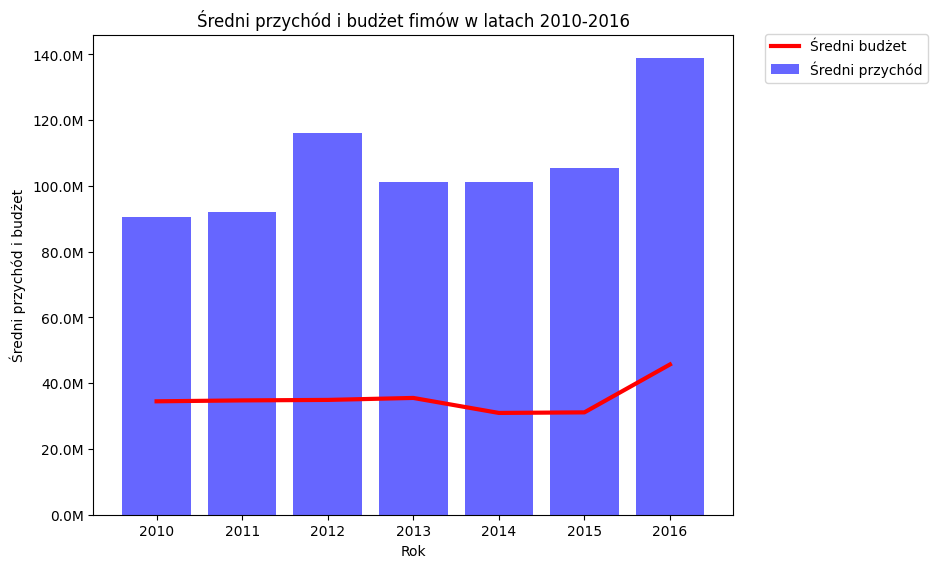

In [13]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(grouped_df['release_year'],grouped_df['revenue'],label='Średni przychód',
          color='blue',
          alpha=0.6
          )
axes.plot(grouped_df['release_year'],grouped_df['budget'],label='Średni budżet',linewidth=3,
          color='red')
axes.legend(loc=(1.05,0.9))
axes.set_xlabel('Rok')
axes.set_ylabel('Średni przychód i budżet')
axes.set_title('Średni przychód i budżet fimów w latach 2010-2016')

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

axes.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

In [14]:
genres = pd.read_csv('tmdb_genres.csv')

In [15]:
filmy_z_gatunkami = pd.merge(df, genres, left_on='genre_id', right_index=True)
filmy_z_gatunkami.head()

,Unnamed: 0_x,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,release_year,Unnamed: 0_y,genres
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0,10749.0,Romance
5,5,258000000,http://www.sonypictures.com/movies/spider-man3/,559,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,2007-05-01,890871626,139.0,Released,The battle within.,Spider-Man 3,5.9,3576,14.0,2007.0,9648.0,Mystery
6,6,260000000,http://disney.go.com/disneypictures/tangled/,38757,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,2010-11-24,591794936,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,16.0,2010.0,99.0,Documentary
8,8,250000000,http://harrypotter.warnerbros.com/harrypottera...,767,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,2009-07-07,933959197,153.0,Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,12.0,2009.0,10749.0,Romance
10,10,270000000,http://www.superman.com,1452,en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,2006-06-28,391081192,154.0,Released,NaN,Superman Returns,5.4,1400,12.0,2006.0,10749.0,Romance


In [16]:
najczestszy_gatunek = filmy_z_gatunkami['genres'].mode()[0]

liczba_filmow_gatunku = filmy_z_gatunkami[filmy_z_gatunkami['genres'] == najczestszy_gatunek].shape[0]

print("Najczęściej występujący gatunek filmu to: ", najczestszy_gatunek)
print("Liczba filmów tego gatunku to: ", liczba_filmow_gatunku)

Najczęściej występujący gatunek filmu to:  TV Movie
Liczba filmów tego gatunku to:  1207


In [17]:
sredni_czas_trwania = filmy_z_gatunkami.groupby('genres')['runtime'].mean()

# Określenie gatunku, którego filmy trwają średnio najdłużej
najdluzej_trwajacy_gatunek = sredni_czas_trwania.idxmax()
sredni_czas_najdluzszego_gatunku = sredni_czas_trwania.max()

print("Gatunek filmu, którego filmy trwają średnio najdłużej: ", najdluzej_trwajacy_gatunek)
print("Średni czas trwania tego gatunku: ", sredni_czas_najdluzszego_gatunku, "minut")

Gatunek filmu, którego filmy trwają średnio najdłużej:  TV Movie
Średni czas trwania tego gatunku:  115.52155887230514 minut


In [20]:
movies_runtimes = filmy_z_gatunkami.loc[filmy_z_gatunkami['genres'].str.contains('TV Movie', na=False), 'runtime']
movies_runtimes
plt.hist(movies_runtimes['runtime'], bins=20, color='skyblue')
plt.xlabel('Czas trwania')
plt.ylabel('Liczba filmów')
plt.title(f'Histogram czasu trwania filmów gatunku {najdluzej_trwajacy_gatunek}')
plt.show()

KeyError: 'runtime'